<a href="https://colab.research.google.com/github/ich-20211101/appliedMultivariateStatisticalAnalysis/blob/main/Class%202%20-%20Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# URL of the iris dataset
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'

# Create a DataFrame from the dataset
iris = pd.read_csv(url)

In [6]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
# Get basic statistical summary of the dataset
print("\nSummary statistics:")
iris.describe()


Summary statistics:


,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
# Compute pairwise correlations between numeric variables
print("\nCorrelation matrix:")
correlation_matrix = iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].corr()
correlation_matrix


Correlation matrix:


,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


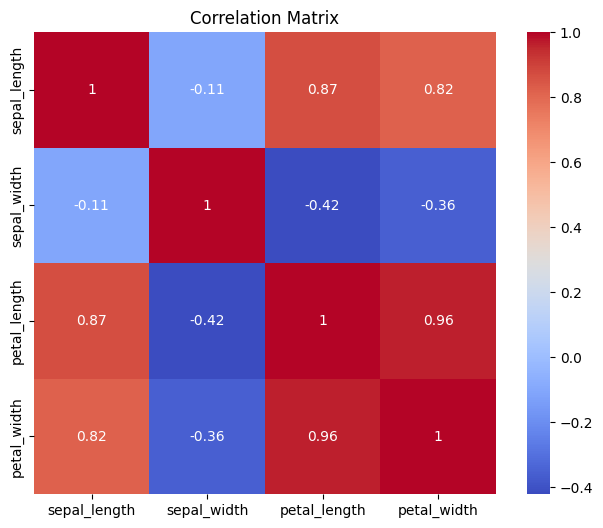

In [5]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

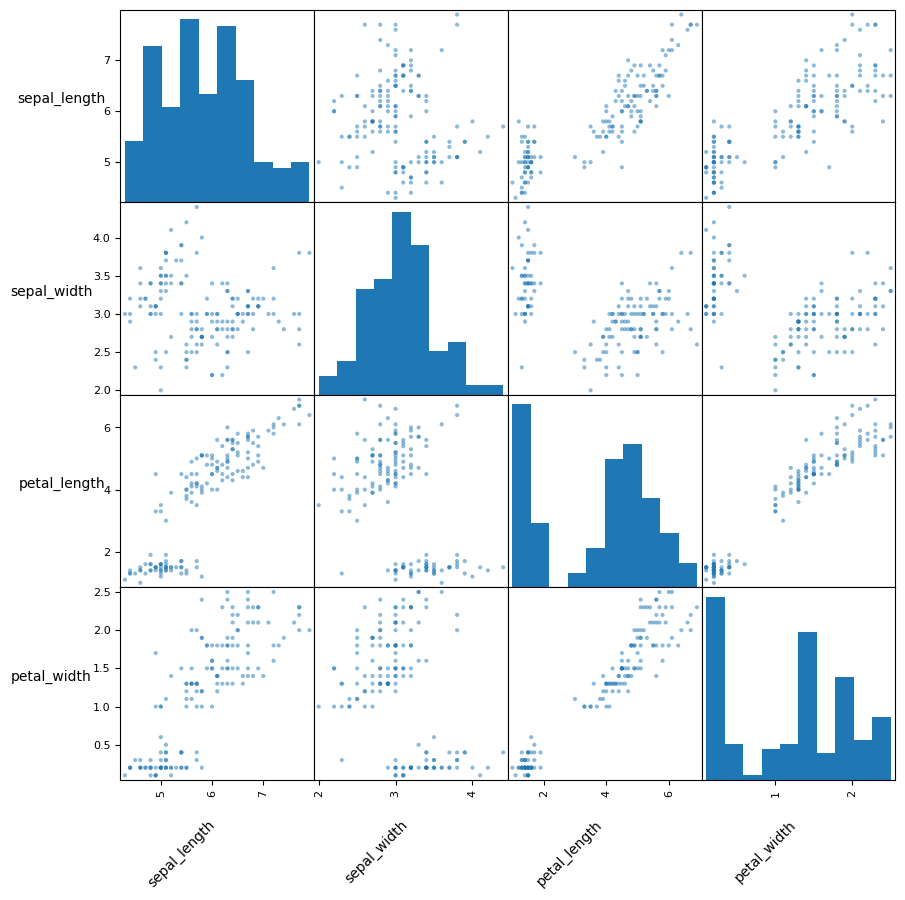

In [7]:
variables = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# Create a scatter matrix
scatter_matrix = pd.plotting.scatter_matrix(iris[variables], figsize=(10, 10))

# Customize the scatter matrix plot
for ax in scatter_matrix.flatten():
    ax.xaxis.label.set_rotation(45)
    ax.yaxis.label.set_rotation(0)
    ax.xaxis.label.set_ha('right')
    ax.yaxis.label.set_ha('center')
    ax.xaxis.labelpad = 15
    ax.yaxis.labelpad = 30

plt.show()

In [8]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.api import OLS, add_constant

# X = add_constant(iris[['sepal_length', 'sepal_width', 'petal_length']])
X = iris[['sepal_length', 'sepal_width', 'petal_length']]

# Create the target variable
y = iris['petal_width']

# Fit a linear regression model
model = OLS(y, X).fit()

# Calculate VIF for each predictor
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Print the VIF values
print(vif)

       Variable         VIF
0  sepal_length  204.766748
1   sepal_width   85.619529
2  petal_length   36.711712


In [13]:
X = iris[['sepal_length', 'sepal_width', 'petal_length']]
X = sm.add_constant(X)  # Add a constant term to the features
y = iris['petal_width']

# Fit the multivariate regression model
model = sm.OLS(y, X)
results = model.fit()

# Print the summary of the regression results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            petal_width   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     736.9
Date:                Fri, 16 May 2025   Prob (F-statistic):           6.20e-88
Time:                        00:39:44   Log-Likelihood:                 36.809
No. Observations:                 150   AIC:                            -65.62
Df Residuals:                     146   BIC:                            -53.57
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.2487      0.178     -1.396   

In [14]:
# Import the dataset
adult = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data')
col_names = ['age',
             'workclass',
             'fnlwgt',
             'education',
             'education-num',
             'marital-status',
             'occupation',
             'relationship',
             'race',
             'sex',
             'capital-gain',
             'capital-loss',
             'hours-per-week',
             'native-country',
             'richness']

In [18]:
adult.columns = col_names
age_race = adult[['age','race', 'hours-per-week', 'capital-gain', 'sex']]

In [24]:
age_race

,age,race,hours-per-week,capital-gain,sex
0,50,White,13,0,Male
1,38,White,40,0,Male
2,53,Black,40,0,Male
3,28,Black,40,0,Female
4,37,White,40,0,Female
...,...,...,...,...,...
32555,27,White,38,0,Female
32556,40,White,40,0,Male
32557,58,White,40,0,Female
32558,22,White,20,0,Male


In [26]:
## Predoct Capital gain
X = age_race[['age', 'hours-per-week']]
y = age_race[['capital-gain']]

result = sm.OLS(y, X).fit()
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:           capital-gain   R-squared (uncentered):                   0.027
Model:                            OLS   Adj. R-squared (uncentered):              0.027
Method:                 Least Squares   F-statistic:                              456.1
Date:                Fri, 16 May 2025   Prob (F-statistic):                   4.37e-196
Time:                        00:45:28   Log-Likelihood:                     -3.3611e+05
No. Observations:               32560   AIC:                                  6.722e+05
Df Residuals:                   32558   BIC:                                  6.722e+05
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

In [34]:
one_hot_encoded = pd.get_dummies(age_race['race'], prefix='race')

# Concatenate the one-hot encoded columns with the original DataFrame
age_race_encoded = pd.concat([age_race, one_hot_encoded], axis=1)

# Drop the original 'race' column
age_race_encoded.drop('race', axis=1, inplace=True)

# Display the encoded DataFrame
age_race_encoded.head()

,age,hours-per-week,capital-gain,sex,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White
0,50,13,0,Male,False,False,False,False,True
1,38,40,0,Male,False,False,False,False,True
2,53,40,0,Male,False,False,True,False,False
3,28,40,0,Female,False,False,True,False,False
4,37,40,0,Female,False,False,False,False,True
